### Importing the Libraries

In [1]:
! pip install -q pyspark==3.1.2 spark-nlp

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sparknlp
import pyspark
from sparknlp.annotator import *
from sparknlp.base import *
spark = sparknlp.start()
from sparknlp.base import *
from sparknlp.annotator import *
from pyspark.ml import Pipeline
from sparknlp.pretrained import PretrainedPipeline
from pyspark.ml.feature import Bucketizer
from pyspark.sql.functions import *
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
spark.conf.set("spark.sql.caseSensitive", "true")

In [3]:
spark = SparkSession.builder.enableHiveSupport().appName('AmazonData').getOrCreate()
sc = spark.sparkContext

In [4]:
spark.sparkContext.getConf().getAll()

[('spark.eventLog.enabled', 'true'),
 ('spark.dynamicAllocation.minExecutors', '1'),
 ('spark.driver.port', '39135'),
 ('spark.executor.memory', '5739m'),
 ('spark.kryoserializer.buffer.max', '2000M'),
 ('spark.serializer', 'org.apache.spark.serializer.KryoSerializer'),
 ('spark.driver.maxResultSize', '0'),
 ('spark.yarn.unmanagedAM.enabled', 'true'),
 ('spark.sql.autoBroadcastJoinThreshold', '43m'),
 ('spark.ui.filters',
  'org.apache.hadoop.yarn.server.webproxy.amfilter.AmIpFilter'),
 ('spark.app.startTime', '1647184633260'),
 ('spark.repl.local.jars',
  'file:///root/.ivy2/jars/com.johnsnowlabs.nlp_spark-nlp_2.12-3.3.4.jar,file:///root/.ivy2/jars/com.typesafe_config-1.4.1.jar,file:///root/.ivy2/jars/org.rocksdb_rocksdbjni-6.5.3.jar,file:///root/.ivy2/jars/com.amazonaws_aws-java-sdk-bundle-1.11.603.jar,file:///root/.ivy2/jars/com.github.universal-automata_liblevenshtein-3.0.0.jar,file:///root/.ivy2/jars/com.navigamez_greex-1.0.jar,file:///root/.ivy2/jars/org.json4s_json4s-ext_2.12-3.

### Paths

In [5]:
AF= 'gs://sunenabigdata/actaul_data_json/AMAZON_FASHION.json'
AB= 'gs://sunenabigdata/actaul_data_json/All_Beauty.json'
CSJ= 'gs://sunenabigdata/actaul_data_json/Clothing_Shoes_and_Jewelry.json'
LB= 'gs://sunenabigdata/actaul_data_json/Luxury_Beauty.json'
mAF= 'gs://sunenabigdata/meta_data_json/meta_AMAZON_FASHION.json'
mAB= 'gs://sunenabigdata/meta_data_json/meta_All_Beauty.json'
mCSJ= 'gs://sunenabigdata/meta_data_json/meta_Clothing_Shoes_and_Jewelry.json'
mLB= 'gs://sunenabigdata/meta_data_json/meta_Luxury_Beauty.json'

### Loading Actual Data

In [6]:
df_AF = spark.read.json(AF)
df_AF = df_AF.withColumn("Category", lit("Amazon Fashion"))
df_AB = spark.read.json(AB)
df_AB = df_AB.withColumn("Category", lit("All Beauty"))
df_CSJ = spark.read.json(CSJ)
df_CSJ = df_CSJ.withColumn("Category", lit("Clothing, Shoes and Jewelery"))
df_LB= spark.read.json(LB)
df_LB = df_LB.withColumn("Category", lit("Luxury Beauty"))

22/03/13 15:18:21 WARN org.apache.spark.sql.catalyst.util.package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


### Loading Meta Data

In [7]:
mdf_AF = spark.read.json(mAF)
mdf_AB = spark.read.json(mAB)
mdf_CSJ = spark.read.json(mCSJ)
mdf_LB= spark.read.json(mLB)

### Cleaning and Joining Actual Data

In [8]:
df_AF.columns

['asin',
 'image',
 'overall',
 'reviewText',
 'reviewTime',
 'reviewerID',
 'reviewerName',
 'style',
 'summary',
 'unixReviewTime',
 'verified',
 'vote',
 'Category']

In [9]:
df1_AF=df_AF.drop("reviewerName","style","image", "vote")

In [10]:
df1_AF.columns

['asin',
 'overall',
 'reviewText',
 'reviewTime',
 'reviewerID',
 'summary',
 'unixReviewTime',
 'verified',
 'Category']

In [11]:
df_AB.columns

['asin',
 'image',
 'overall',
 'reviewText',
 'reviewTime',
 'reviewerID',
 'reviewerName',
 'style',
 'summary',
 'unixReviewTime',
 'verified',
 'vote',
 'Category']

In [12]:
df1_AB=df_AB.drop("reviewerName","style","image", "vote")

In [13]:
df1_AB.columns

['asin',
 'overall',
 'reviewText',
 'reviewTime',
 'reviewerID',
 'summary',
 'unixReviewTime',
 'verified',
 'Category']

In [14]:
df_CSJ.columns

['asin',
 'image',
 'overall',
 'reviewText',
 'reviewTime',
 'reviewerID',
 'reviewerName',
 'style',
 'summary',
 'unixReviewTime',
 'verified',
 'vote',
 'Category']

In [15]:
df1_CSJ=df_CSJ.drop("reviewerName","style","image", "vote")

In [16]:
df1_CSJ.columns

['asin',
 'overall',
 'reviewText',
 'reviewTime',
 'reviewerID',
 'summary',
 'unixReviewTime',
 'verified',
 'Category']

In [17]:
df_LB.columns

['asin',
 'image',
 'overall',
 'reviewText',
 'reviewTime',
 'reviewerID',
 'reviewerName',
 'style',
 'summary',
 'unixReviewTime',
 'verified',
 'vote',
 'Category']

In [18]:
df1_LB=df_LB.drop("reviewerName","style","image", "vote")

In [19]:
df1_LB.columns

['asin',
 'overall',
 'reviewText',
 'reviewTime',
 'reviewerID',
 'summary',
 'unixReviewTime',
 'verified',
 'Category']

In [20]:
whole= df1_AF.union(df1_AB)
whole= whole.union(df1_CSJ)
whole=whole.union(df1_LB)

In [21]:
whole.columns

['asin',
 'overall',
 'reviewText',
 'reviewTime',
 'reviewerID',
 'summary',
 'unixReviewTime',
 'verified',
 'Category']

In [22]:
whole.count()

34121708

In [23]:
#renaming asin column to productID
whole = whole.withColumnRenamed("asin","productID")

In [24]:
whole.columns

['productID',
 'overall',
 'reviewText',
 'reviewTime',
 'reviewerID',
 'summary',
 'unixReviewTime',
 'verified',
 'Category']

### Cleaning and Joining Meta Data

In [25]:
mdf_AF.columns

['also_buy',
 'also_view',
 'asin',
 'brand',
 'date',
 'description',
 'details',
 'feature',
 'fit',
 'imageURL',
 'imageURLHighRes',
 'price',
 'rank',
 'similar_item',
 'tech1',
 'title']

In [26]:
mdf1_AF=mdf_AF.drop('also_buy','also_view', 'description', 'details', 'feature', 'fit',
                    'imageURL','imageURLHighRes', 'similar_item','tech1')

In [27]:
mdf1_AF.columns

['asin', 'brand', 'date', 'price', 'rank', 'title']

In [28]:
mdf_AB.columns

['also_buy',
 'also_view',
 'asin',
 'brand',
 'category',
 'date',
 'description',
 'details',
 'feature',
 'fit',
 'imageURL',
 'imageURLHighRes',
 'main_cat',
 'price',
 'rank',
 'similar_item',
 'tech1',
 'tech2',
 'title']

In [29]:
mdf1_AB=mdf_AB.drop('also_buy','also_view','category', 'description', 'details', 'feature', 'fit',
                    'imageURL','imageURLHighRes', 'main_cat','similar_item','tech1', 'tech2')

In [30]:
mdf1_AB.columns

['asin', 'brand', 'date', 'price', 'rank', 'title']

In [31]:
mdf_CSJ.columns

['also_buy',
 'also_view',
 'asin',
 'brand',
 'category',
 'date',
 'description',
 'details',
 'feature',
 'fit',
 'imageURL',
 'imageURLHighRes',
 'main_cat',
 'price',
 'rank',
 'similar_item',
 'tech1',
 'tech2',
 'title']

In [32]:
mdf1_CSJ=mdf_CSJ.drop('also_buy','also_view','category', 'description', 'details', 'feature', 'fit',
                    'imageURL','imageURLHighRes', 'main_cat','similar_item','tech1', 'tech2')

In [33]:
mdf1_CSJ.columns

['asin', 'brand', 'date', 'price', 'rank', 'title']

In [34]:
mdf_LB.columns

['also_buy',
 'also_view',
 'asin',
 'brand',
 'category',
 'date',
 'description',
 'details',
 'feature',
 'fit',
 'imageURL',
 'imageURLHighRes',
 'main_cat',
 'price',
 'rank',
 'similar_item',
 'tech1',
 'tech2',
 'title']

In [35]:
mdf1_LB=mdf_LB.drop('also_buy','also_view','category', 'description', 'details', 'feature', 'fit',
                    'imageURL','imageURLHighRes', 'main_cat','similar_item','tech1', 'tech2')

In [36]:
mdf1_LB.columns

['asin', 'brand', 'date', 'price', 'rank', 'title']

In [37]:
m_whole= mdf1_AF.union(mdf1_AB)
m_whole= m_whole.union(mdf1_CSJ)
m_whole=m_whole.union(mdf1_LB)

In [38]:
m_whole.columns

['asin', 'brand', 'date', 'price', 'rank', 'title']

In [39]:
m_whole.count()

2916887

### Joining Metadata and Actual Data

In [40]:
finaldf= whole.join(m_whole, whole.productID == m_whole.asin, 'inner')

In [41]:
finaldf.columns

['productID',
 'overall',
 'reviewText',
 'reviewTime',
 'reviewerID',
 'summary',
 'unixReviewTime',
 'verified',
 'Category',
 'asin',
 'brand',
 'date',
 'price',
 'rank',
 'title']

In [42]:
#dropping asin coloumn
finaldf = finaldf.drop("asin")

#### We are using the productID, reviewerID and unixReviewTime to create an unique ID. The ID will be unique because it is not possible for a reviewer to submit 2 reviews at the same time for the same product

In [43]:
finaldf=finaldf.select(concat(finaldf.productID, finaldf.reviewerID, finaldf.unixReviewTime).alias("uniqueID"),"*")

In [44]:
finaldf.columns

['uniqueID',
 'productID',
 'overall',
 'reviewText',
 'reviewTime',
 'reviewerID',
 'summary',
 'unixReviewTime',
 'verified',
 'Category',
 'brand',
 'date',
 'price',
 'rank',
 'title']

In [45]:
finaldf.count()

34474411

In [46]:
finaldf.agg(countDistinct("uniqueID")).show()

+---------------+
|count(uniqueID)|
+---------------+
|       33464003|
+---------------+



#### From above we see that the there are 33464003 unique reviews. We will filter for these reviews in our main data frame

In [47]:
finaldf= finaldf.dropDuplicates(['uniqueID'])

In [108]:
finaldf.show(2, truncate=False)

+----------------------------------+----------+-------+-------------------------------------------------------------------------------------------------------------+-----------+--------------+----------+--------------+--------+----------------------------+-------------------------------------+----+-----+-----------------+--------------------------------------------------------------+-------------------+----+-----+
|uniqueID                          |productID |overall|reviewText                                                                                                   |reviewTime |reviewerID    |summary   |unixReviewTime|verified|Category                    |brand                                |date|price|rank             |title                                                         |timestamp          |year|month|
+----------------------------------+----------+-------+-------------------------------------------------------------------------------------------------------------

In [48]:
a=finaldf.count()
a

33464003

### EDA / Performing SQL queries

In [49]:
#List of distinct product ID's (productID)
finaldf.select('productID').distinct().show()

+----------+
| productID|
+----------+
|6030555170|
|B00001OGXK|
|B00006I5XQ|
|B0000ANHRR|
|B0001EKVGS|
|B0001N5TCK|
|B00024WC7S|
|B0002L2LGI|
|B0002M4VBA|
|B0002M9DO0|
|B0002MPS7G|
|B0002UUCYM|
|B0002Z7NHQ|
|B0003DKV80|
|B00062Y9I6|
|B00063VWTY|
|B0006MFAWK|
|B0006UD7RC|
|B0007MRQTO|
|B0007NI1QK|
+----------+
only showing top 20 rows



In [50]:
#Count of distinct product ID's (productID)
b=finaldf.select('productID').distinct().count()
b

2912083

In [51]:
#List of distinct reviewer ID's (reviewerID)
finaldf.select('reviewerID').distinct().show()

+--------------+
|    reviewerID|
+--------------+
|A2BPIK30ETIBXT|
|A2SUPLV1DTYTLQ|
|A3DFSTK3Z4K6L9|
|A2SKTNI08E626E|
| AFPL4KJ58AOGC|
| A1KND2STX80MD|
|A1TSVSJSONEXGQ|
|A22A6I87DV7H7M|
|A2CTDIZLL09ZC2|
|A2GPNXFUUV51ZZ|
|A2IR6SU646D56S|
|A3OAHWDD887HIN|
|A2MGAPVVADR7ZQ|
|A2N1GN7JOBW8ST|
|A10Z7G680WQY1W|
| AQO5IOPOF6TMF|
|A2RT2AFA6NJHBR|
|A1FHV5S4Q35EIE|
|A3TKYALEYQSFUW|
| AOM7MJADUZCGO|
+--------------+
only showing top 20 rows



In [52]:
#Count of distinct reviewer ID's (reviewerID)
c=finaldf.select('reviewerID').distinct().count()
c

12947971

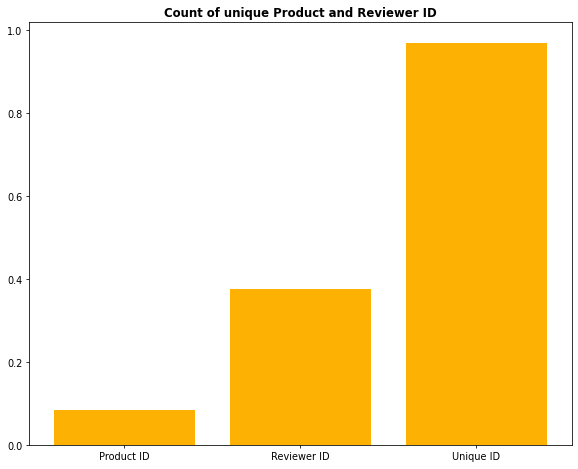

In [53]:
count = pd.DataFrame([["Product ID", b/34474411],["Reviewer ID", c/34474411], ["Unique ID", a/34474411]], columns = ["Item", "unique count"])
count

fig, ax = plt.subplots(figsize = (10,8), dpi=70)
ax.bar(count["Item"], count["unique count"], color = "#fcb103")
ax.set_title("Count of unique Product and Reviewer ID", fontweight = "bold")
ax.yaxis.Exponent = 0;

In [54]:
#Checking distinct reviewer ID's (reviewerID) with number of reviews- top
finaldf.groupby('reviewerID').count().sort("count").orderBy(["count"], ascending=[0]).show(20)

+--------------+-----+
|    reviewerID|count|
+--------------+-----+
| ALFRMOGTO1K4M|  683|
|A2OWR2PL3DLWS4|  497|
| AENH50GW3OKDA|  496|
|A2OS7CFQI4DWPT|  493|
| AVU1ILDDYW301|  483|
|A3W5A9X3HHACQT|  423|
|A2RYWPOL4NN2KG|  422|
|A1RRMZKOMZ2M7J|  414|
|A2503LT8PZIHAD|  408|
|A3W4D8XOGLWUN5|  403|
|A2QDOJFFLFGF18|  399|
|A1J7RPYGVGH5O3|  398|
|A3LV42NBFM829N|  392|
| AQY5XBYSENNZQ|  384|
|A3J5XBZ9ZNEZOC|  382|
|A3G5KDMFNRUXHB|  376|
|A20DZFBGQ4278M|  361|
|A1QBOC76MIOJYP|  358|
|A1M1Y5UGONAW06|  351|
|A3JBQHQZEZPQK4|  347|
+--------------+-----+
only showing top 20 rows



In [55]:
#Checking distinct reviewer ID's (reviewerID) with number of reviews- bottom
finaldf.groupby('reviewerID').count().sort("count").orderBy(["count"], descending=[0]).show(20)

+--------------+-----+
|    reviewerID|count|
+--------------+-----+
|A2IZ9EFZ9GPUEV|    1|
| AR8YWIC7Z3JRC|    1|
|A3GSAR4LBI0TEB|    1|
|A3ISBZXWMFP2F4|    1|
|A3CI2NEVE74MFO|    1|
|A1DDCC2IKT0GFM|    1|
| AUW7YIB5PAJW2|    1|
|A3K0M98CJ4RI7M|    1|
|A2ECE97I4VIX40|    1|
|A2DXDHAE56C2MJ|    1|
| AZX9WW6G8D00N|    1|
| AXBDXYN7U6EB9|    1|
|A1VV4U1O6V7309|    1|
| A9JA0NPF1I35A|    1|
| A63CPEVP7NKAP|    1|
|A34YM3AI5MMGEG|    1|
|A161PJKA78ABSN|    1|
|A34QF4P7OHPLSZ|    1|
|A1U6HW2X442MXL|    1|
|A3QO9A3UHF55GY|    1|
+--------------+-----+
only showing top 20 rows



In [56]:
#Saving reviewer ID and count of reviews in a dataframe
reviewer_df = finaldf.groupby('reviewerID').count()

In [57]:
#renaming count column to reviewer_count
reviewer_df = reviewer_df.withColumnRenamed("count","reviewer_count")

In [58]:
reviewer_df.show()

+--------------+--------------+
|    reviewerID|reviewer_count|
+--------------+--------------+
| AG01KY032P3UI|             1|
|A2C3PKYY7WPWTL|             1|
| A7IB2KI9HJZWU|             5|
| A8WWNJIKFJNXZ|            29|
|A32R2HB7JUKA80|             7|
|A1X5GNR8WFXU90|            21|
|A3LIXQ9DHDCZ4W|             2|
|A1J8LQTMDVWRQG|             2|
|A2K6DTWI1FUAMO|             7|
|A13O1JAG5933CC|             1|
| A2CLDSKXDQ2GN|             1|
|A2CY8H47DGM4MX|             5|
|A3VYPQ7GK8Y3KQ|             1|
|A29J08N8F9N4EO|             2|
|A13QOK3SKIT9QL|           160|
|A1VGK1IJXGQ7PN|            37|
| AF4WJ9I4DAX6K|            26|
|A2T9BE6V14UDW7|             1|
|A3DV0OARS2MCDE|             7|
|A1S76TCGY6W4FT|             1|
+--------------+--------------+
only showing top 20 rows



In [59]:
finaldf.columns

['uniqueID',
 'productID',
 'overall',
 'reviewText',
 'reviewTime',
 'reviewerID',
 'summary',
 'unixReviewTime',
 'verified',
 'Category',
 'brand',
 'date',
 'price',
 'rank',
 'title']

In [60]:
#Counting the number of ratings in each group
rating_count = finaldf.groupBy('overall').count()
rating_count = rating_count.toPandas()

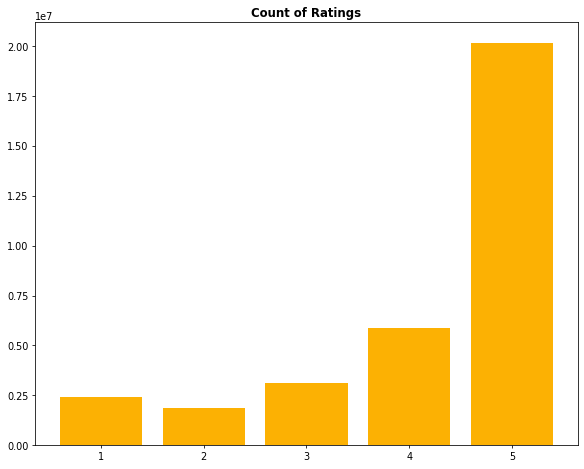

In [61]:
fig, ax = plt.subplots(figsize = (10,8), dpi=70)

ax.bar(rating_count['overall'],rating_count['count'], color = '#fcb103');
ax.set_title("Count of Ratings", fontweight = 'bold');

In [62]:
category_rating = finaldf.groupBy('Category').agg({'overall':'avg'})

In [63]:
category_rating = category_rating.toPandas()

(3.5, 4.3)

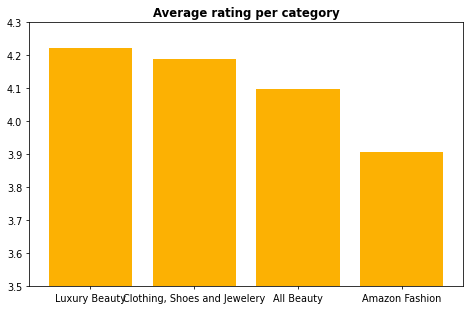

In [64]:
fig, ax = plt.subplots(figsize = (8,5), dpi = 70)


ax.bar(category_rating['Category'],category_rating['avg(overall)'], color = '#fcb103')
ax.set_title("Average rating per category", fontweight = 'bold')
ax.set_ylim(3.5,4.3)
# ax.set_xticklabels(labels = category_rating['Category'], rotation = 45);

In [65]:
finaldf = finaldf.withColumn('timestamp', from_unixtime(col("unixReviewTime")))

In [66]:
finaldf = finaldf.withColumn('year', year('timestamp'))
finaldf = finaldf.withColumn('month', month('timestamp'))

In [67]:
avgrating_bytime = finaldf.groupBy('Category', 'year', 'month').agg({'overall':'avg'}).orderBy('Category', 'year', 'month', ascending = True)

In [68]:
avgrating_bytime = avgrating_bytime.toPandas()

In [103]:
avgrating_bytime1 = avgrating_bytime[avgrating_bytime['year']>2015]
avgrating_bytime1

,Category,year,month,avg(overall)
183,All Beauty,2016,1,4.084591
184,All Beauty,2016,2,4.069677
185,All Beauty,2016,3,4.079281
186,All Beauty,2016,4,4.115568
187,All Beauty,2016,5,4.056182
...,...,...,...,...
802,Luxury Beauty,2018,5,3.961813
803,Luxury Beauty,2018,6,4.029281
804,Luxury Beauty,2018,7,4.024403
805,Luxury Beauty,2018,8,4.066057


/tmp/ipykernel_9473/1583478947.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avgrating_bytime1['year-month'] = avgrating_bytime1['year'].astype(str) + avgrating_bytime1['month'].astype(str)
/tmp/ipykernel_9473/1583478947.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax.plot(avgrating_bytime1[avgrating_bytime['Category'] == 'All Beauty']['avg(overall)'].values, label = "All Beauty")
/tmp/ipykernel_9473/1583478947.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax.plot(avgrating_bytime1[avgrating_bytime['Category'] == 'Luxury Beauty']['avg(overall)'].values, label = "Luxury Beauty")
/tmp/ipykernel_9473/1583478947.py:12: UserWarning: Boolean Series key will be reindexe

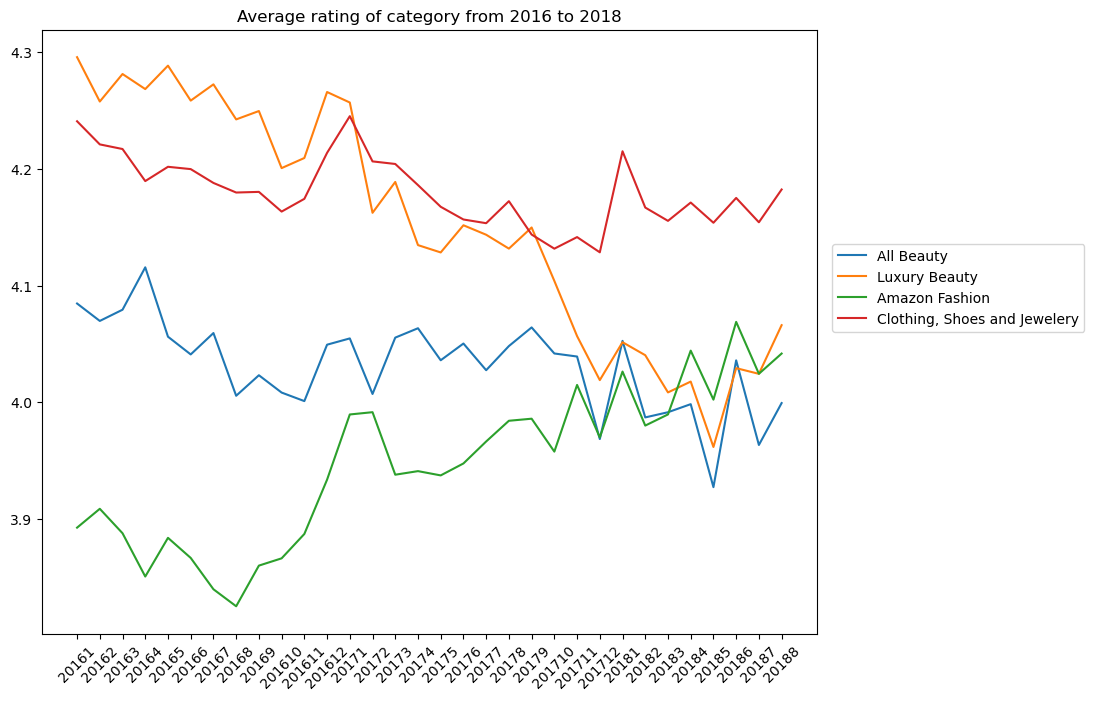

In [106]:
fig, ax = plt.subplots(figsize = (10,8), dpi = 100)

avgrating_bytime1['year-month'] = avgrating_bytime1['year'].astype(str) + avgrating_bytime1['month'].astype(str)

avgrating_bytime1 = avgrating_bytime1[~avgrating_bytime1['year-month'].isin(['20189', '201810'])]

xtickslabels = avgrating_bytime1[avgrating_bytime1['Category'] == "All Beauty"]['year-month']
xticks = range(len(avgrating_bytime1[avgrating_bytime1['Category'] == "All Beauty"]))

ax.plot(avgrating_bytime1[avgrating_bytime['Category'] == 'All Beauty']['avg(overall)'].values, label = "All Beauty")
ax.plot(avgrating_bytime1[avgrating_bytime['Category'] == 'Luxury Beauty']['avg(overall)'].values, label = "Luxury Beauty")
ax.plot(avgrating_bytime1[avgrating_bytime['Category'] == 'Amazon Fashion']['avg(overall)'].values, label = "Amazon Fashion")
ax.plot(avgrating_bytime1[avgrating_bytime['Category'] == 'Clothing, Shoes and Jewelery']['avg(overall)'].values, label = "Clothing, Shoes and Jewelery")

ax.set_xticks(xticks)
ax.set_xticklabels(xtickslabels, rotation = 45)

ax.set_title("Average rating of category from 2016 to 2018")

ax.legend(loc = (1.02,0.5))

plt.savefig("avg_ratings_by_time.png")

## 10 Core Data

### We will filter out the products that do not have more than 10 reviews. This will give better results for our NLP analysis, or the models we run

In [71]:
df=finaldf.groupBy(col('productID').alias('productID1')).count().orderBy("count", ascending=False)

In [72]:
df.show(2)

+----------+-----+
|productID1|count|
+----------+-----+
|B00M4NF9H0|13031|
|B00F3EDEOC|11258|
+----------+-----+
only showing top 2 rows



In [73]:
df2= finaldf.join(df, finaldf.productID == df.productID1, 'inner')

In [74]:
df2=df2.drop('productID1')

In [75]:
df2.columns

['uniqueID',
 'productID',
 'overall',
 'reviewText',
 'reviewTime',
 'reviewerID',
 'summary',
 'unixReviewTime',
 'verified',
 'Category',
 'brand',
 'date',
 'price',
 'rank',
 'title',
 'timestamp',
 'year',
 'month',
 'count']

In [76]:
df3=df2.filter(df2['count']>9)

In [77]:
df3.orderBy('count', ascending=True).show(5)

+--------------------+----------+-------+--------------------+-----------+--------------+--------------------+--------------+--------+--------------------+-----------------+-----------------+-----+--------------------+--------------------+-------------------+----+-----+-----+
|            uniqueID| productID|overall|          reviewText| reviewTime|    reviewerID|             summary|unixReviewTime|verified|            Category|            brand|             date|price|                rank|               title|          timestamp|year|month|count|
+--------------------+----------+-------+--------------------+-----------+--------------+--------------------+--------------+--------+--------------------+-----------------+-----------------+-----+--------------------+--------------------+-------------------+----+-----+-----+
|B000N551KQA1BAGCD...|B000N551KQ|    5.0|These are so dant...|03 30, 2007|A1BAGCDRNCK6QR|    Diamond Earrings|    1175212800|    true|Clothing, Shoes a...|Amazon Collect

Checking to see if the reviewText column is null

In [78]:
df3.filter(df3.reviewText.isNull()).count()

34084

We will drop all rows which have null values in the reviewText column

In [79]:
main_final=df3.na.drop(subset=["reviewText"])

In [80]:
main_final.show(2)

+--------------------+----------+-------+--------------------+-----------+--------------+--------------------+--------------+--------+--------------------+-----+------+-----+--------------------+--------------------+-------------------+----+-----+-----+
|            uniqueID| productID|overall|          reviewText| reviewTime|    reviewerID|             summary|unixReviewTime|verified|            Category|brand|  date|price|                rank|               title|          timestamp|year|month|count|
+--------------------+----------+-------+--------------------+-----------+--------------+--------------------+--------------+--------+--------------------+-----+------+-----+--------------------+--------------------+-------------------+----+-----+-----+
|B00001OGXKA3CNG3K...|B00001OGXK|    5.0|Wig was great! Ot...| 11 2, 2013|A3CNG3KRIW0FVF|Excellent accesso...|    1383350400|    true|Clothing, Shoes a...| null|5 star| null|823,903inClothing...|Disguise - Adult ...|2013-11-02 00:00:00|20

In [107]:
main_final.columns

['uniqueID',
 'productID',
 'overall',
 'reviewText',
 'reviewTime',
 'reviewerID',
 'summary',
 'unixReviewTime',
 'verified',
 'Category',
 'brand',
 'date',
 'price',
 'rank',
 'title',
 'timestamp',
 'year',
 'month',
 'count']

In [ ]:
from google.cloud import storage

gcs_bucket = 'sunenabigdata'

gcs_filepath = 'gs://{}/sunenabigdata1'.format(gcs_bucket)


main_final.coalesce(1).write \
  .mode('overwrite') \
  .csv(gcs_filepath)

In [82]:
13

13